In [1]:
import os
from glob import glob

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tqdm

In [2]:
files = glob('./camera_cal/*.jpg')

In [3]:
print(files)

['./camera_cal/calibration2.jpg', './camera_cal/calibration11.jpg', './camera_cal/calibration16.jpg', './camera_cal/calibration13.jpg', './camera_cal/calibration12.jpg', './camera_cal/calibration20.jpg', './camera_cal/calibration8.jpg', './camera_cal/calibration10.jpg', './camera_cal/calibration17.jpg', './camera_cal/calibration14.jpg', './camera_cal/calibration6.jpg', './camera_cal/calibration1.jpg', './camera_cal/calibration19.jpg', './camera_cal/calibration18.jpg', './camera_cal/calibration4.jpg', './camera_cal/calibration15.jpg', './camera_cal/calibration7.jpg', './camera_cal/calibration9.jpg', './camera_cal/calibration3.jpg', './camera_cal/calibration5.jpg']


In [4]:
class CameraCalibrator:
    def __init__(self, cal_files):
        print("Calibrating camera. Please wait...")
        self.ret, self.mtx, self.dist, self.rvecs, self.tvecs = \
            self._calibrate_camera(cal_files)
        print("Camera calibration complete.")
    
    def _calibrate_camera(self, files):
        objp = np.zeros((6 * 9, 3), np.float32)
        objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)
        
        object_points = []
        image_points = []
        
        for fname in tqdm.tqdm(files):
            img = cv2.imread(fname)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
            if ret:
                object_points.append(objp)
                image_points.append(corners)           
            ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, gray.shape[::-1], None, None)
        return ret, mtx, dist, rvecs, tvecs
    
    def undistort(self, img):
        return cv2.undistort(img, self.mtx, self.dist, None, self.mtx)

In [5]:
calibrator = CameraCalibrator(files)

  0%|          | 0/20 [00:00<?, ?it/s]

Calibrating camera. Please wait...


100%|██████████| 20/20 [00:10<00:00,  1.44it/s]

Camera calibration complete.


In [6]:
def show_original_and_undistorted(img_path, calibrator):
    img = cv2.imread(img_path)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    undistorted = calibrator.undistort(img)
    ax2.imshow(undistorted)
    ax2.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

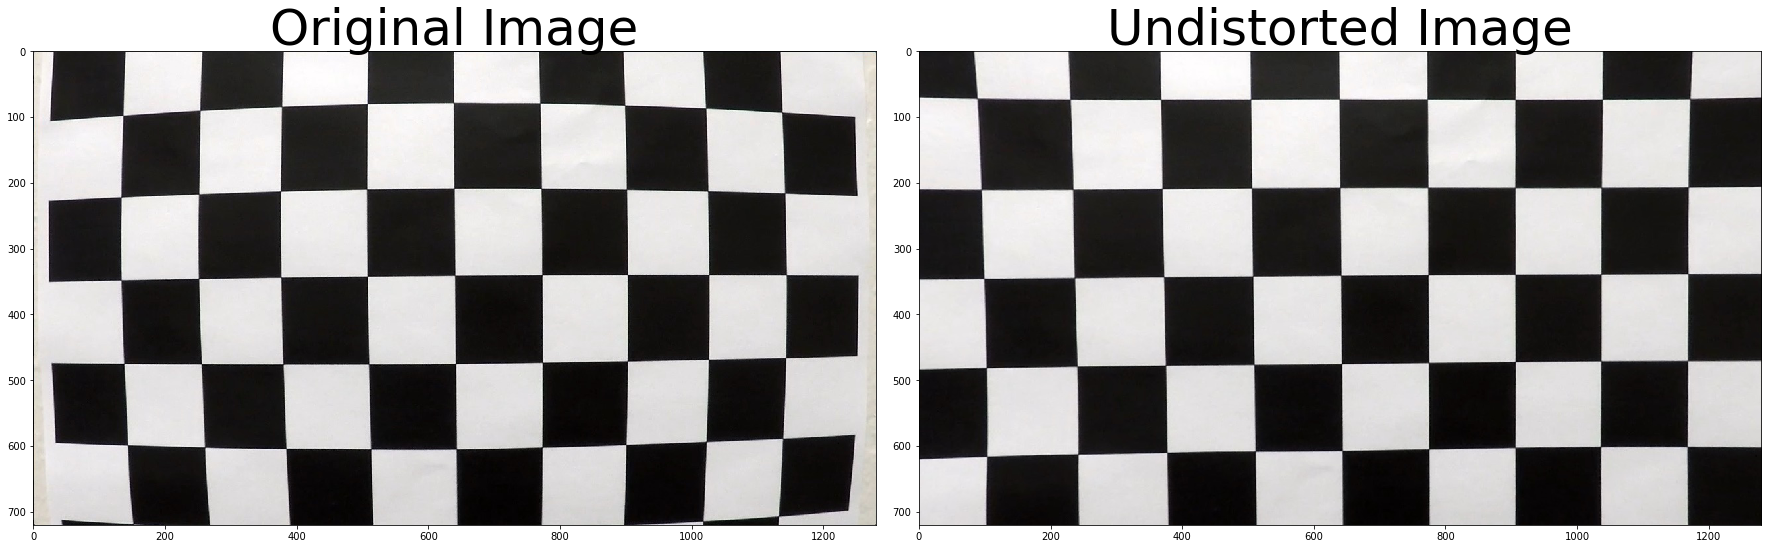

In [7]:
show_original_and_undistorted('./camera_cal/calibration1.jpg', calibrator)


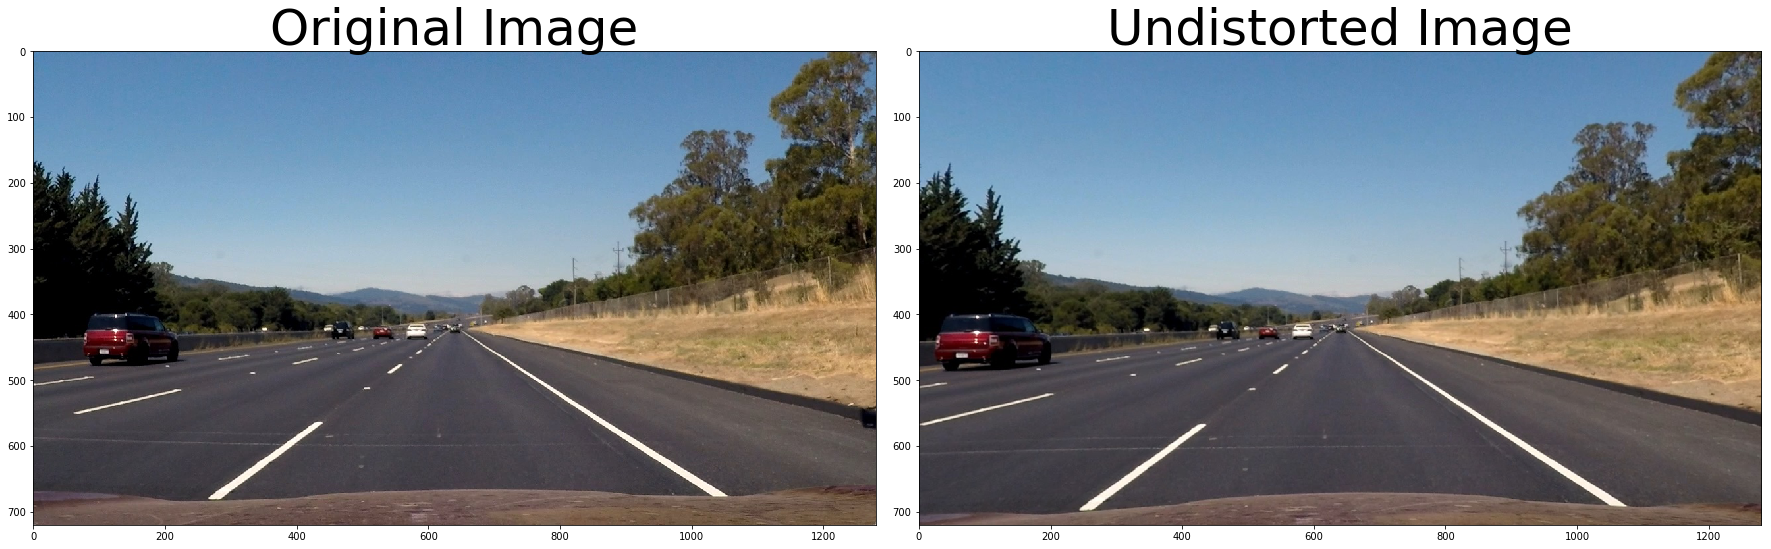

In [8]:
show_original_and_undistorted('./test_images/straight_lines2.jpg', calibrator)

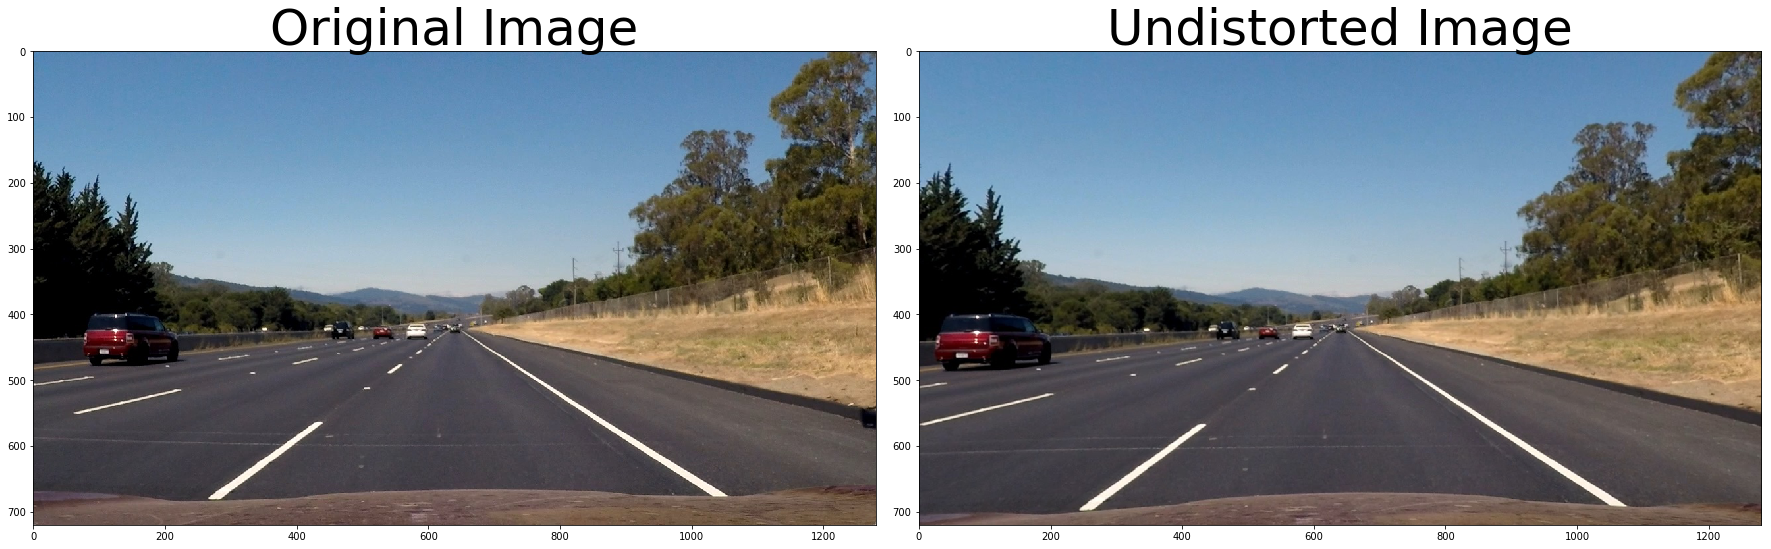

In [9]:
img = cv2.imread('./test_images/straight_lines2.jpg')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
undistorted = calibrator.undistort(img)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [94]:
# src = np.float32([[275, 670], [1030, 670], [607, 444], [672, 444]])
# dst = np.float32([[245, 720], [1048, 720], [245, 0], [1048, 0]])

# src = np.float32([[670, 275], [670, 1030], [444, 607], [444, 672]])
# dst = np.float32([[719, 275], [719, 1030], [444, 607], [0, 672]])

src = np.float32([[259, 684], [1030, 674], [598, 448], [680, 446]])
dst = np.float32([[259, 720], [1030, 720], [259, 0], [1030, 0]])

# Given src and dst points, calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)

In [95]:
img1 = cv2.imread('./test_images/straight_lines2.jpg')
img_size = np.shape(img1)
undist = calibrator.undistort(img1)
warped = cv2.warpPerspective(undist, M, (img_size[1], img_size[0]))
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

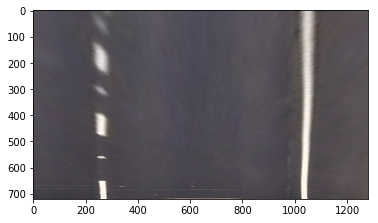

In [96]:
plt.imshow(warped)
plt.show()